<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

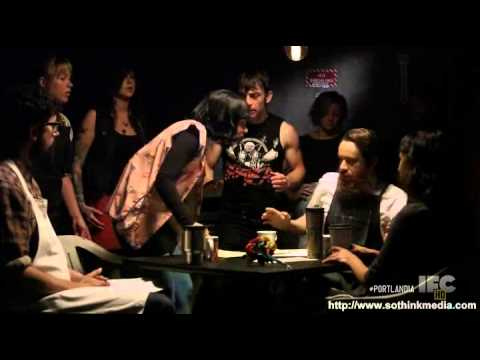

In [314]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [315]:
%pwd

'/home/desktop-g6i88eikhisl/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [316]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [521]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [522]:
shops.shape

(7616, 6)

In [523]:
shops['full_review_text'].dtypes

dtype('O')

In [720]:
import re
def clean(text):
    text_updated = re.sub('[^\s*a-zA-Z]','', text)
    text_updated = text_updated.lower()
    return text_updated

shops['full_review_text_1'] = shops['full_review_text'].apply(clean)
shops['full_review_text_1']


0          checkin love love loved the atmosphere ever...
1         listed in date night austin ambiance in aust...
2          checkin listed in brunch spots i loved the ...
3         very cool decor good drinks nice seating  ho...
4          checkin they are located within the northcr...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok the steeping room is awesome how do they ...
7613      loved coming here for tea and the atmosphere...
7614      the food is just average the booths didnt fe...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text_1, Length: 7616, dtype: object

In [721]:
def clean1(text):
    text_updated = re.sub('^[ \t]+','', text)
    text_updated = text_updated.lower()
    return text_updated

shops['full_review_text_new'] = shops['full_review_text_1'].apply(clean1)
shops['full_review_text_new']

0       checkin love love loved the atmosphere every c...
1       listed in date night austin ambiance in austin...
2       checkin listed in brunch spots i loved the ecl...
3       very cool decor good drinks nice seating  howe...
4       checkin they are located within the northcross...
                              ...                        
7611    i actually step into this restaurant by chance...
7612    ok the steeping room is awesome how do they ha...
7613    loved coming here for tea and the atmosphere w...
7614    the food is just average the booths didnt feel...
7615    i finally stopped in for lunch with my colleag...
Name: full_review_text_new, Length: 7616, dtype: object

In [722]:
# shops['full_review_text'].value_counts()[:20]

In [723]:
# def tokenize(text):
#     """Parses a string into a list of semantic units (words)

#     Args:
#         text (str): The string that the function will tokenize.

#     Returns:
#         list: tokens parsed out by the mechanics of your choice
#     """
#     tokens = re.sub('[^a-zA-Z 0-9]', '', text)
#     tokens = tokens.lower().split() # split it with whitespaces. Instead of string we get back a list
#     tokens_popped = tokens.pop(0)
    
#     return tokens

# shops['tokens'] = shops['full_review_text'].apply(tokenize)
# shops['tokens'].head()

# for doc in shops['tokens']:
#     doc.pop(0)
# shops['tokens']

In [724]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text_new'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

shops['tokens']

0       [checkin, love, love, loved, atmosphere, corne...
1       [listed, date, night, austin, ambiance, austin...
2       [checkin, listed, brunch, spots, loved, eclect...
3       [cool, decor, good, drinks, nice, seating,  , ...
4       [checkin, located, northcross, mall, shopping,...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, steeping, room, awesome, great, menu, ite...
7613    [loved, coming, tea, atmosphere, pretty, fresh...
7614    [food, average, booths, didnt, feel, clean, wa...
7615    [finally, stopped, lunch, colleague, im, glad,...
Name: tokens, Length: 7616, dtype: object

In [725]:
shops.tokens.head()

0    [checkin, love, love, loved, atmosphere, corne...
1    [listed, date, night, austin, ambiance, austin...
2    [checkin, listed, brunch, spots, loved, eclect...
3    [cool, decor, good, drinks, nice, seating,  , ...
4    [checkin, located, northcross, mall, shopping,...
Name: tokens, dtype: object

In [726]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x)) # We are applying the counter to every element in the tokens column and updating it
# every x is a list of tokens in every row 

# Print out the 10 most common words
word_counts.most_common(10)

[(' ', 21988),
 ('coffee', 10351),
 ('place', 5426),
 ('good', 3971),
 ('great', 3919),
 ('like', 3088),
 ('austin', 2252),
 ('checkin', 1966),
 ('love', 1934),
 ('time', 1884)]

In [727]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_new,tokens,star_rating_int,full_review_text_1
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, atmosphere, corne...",5,checkin love love loved the atmosphere ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,listed in date night austin ambiance in austin...,"[listed, date, night, austin, ambiance, austin...",4,listed in date night austin ambiance in aust...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, brunch, spots, loved, eclect...",4,checkin listed in brunch spots i loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,very cool decor good drinks nice seating howe...,"[cool, decor, good, drinks, nice, seating, , ...",2,very cool decor good drinks nice seating ho...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,checkin they are located within the northcross...,"[checkin, located, northcross, mall, shopping,...",4,checkin they are located within the northcr...


In [728]:
def star(text):
    
    raiting = text.split(".")[0] # split it with dot
    raiting1 = raiting.split("0")[0] # split it with zero. Instead of string we get back a list
#     raiting_int = list(map(int, raiting1))
    
    
    return raiting1

In [729]:
shops['star_rating'] = shops['star_rating'].apply(star)
shops['star_rating_int'] = shops['star_rating'].astype(int)
shops['star_rating_int']


0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: star_rating_int, Length: 7616, dtype: int64

In [730]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_new,tokens,star_rating_int,full_review_text_1
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, atmosphere, corne...",5,checkin love love loved the atmosphere ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,listed in date night austin ambiance in austin...,"[listed, date, night, austin, ambiance, austin...",4,listed in date night austin ambiance in aust...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, brunch, spots, loved, eclect...",4,checkin listed in brunch spots i loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,very cool decor good drinks nice seating howe...,"[cool, decor, good, drinks, nice, seating, , ...",2,very cool decor good drinks nice seating ho...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,checkin they are located within the northcross...,"[checkin, located, northcross, mall, shopping,...",4,checkin they are located within the northcr...


In [731]:
word_counts

Counter({'checkin': 1966,
         'love': 1934,
         'loved': 366,
         'atmosphere': 969,
         'corner': 163,
         'coffee': 10351,
         'shop': 1679,
         'style': 101,
         'swings': 65,
         'ordered': 941,
         'matcha': 189,
         'latte': 1615,
         'muy': 5,
         'fantastico': 5,
         'ordering': 204,
         'getting': 335,
         'drink': 1065,
         'pretty': 1363,
         'streamlined': 6,
         'ipad': 71,
         'included': 31,
         'beverage': 82,
         'selections': 78,
         'ranged': 5,
         'wine': 225,
         'desired': 17,
         'level': 73,
         'sweetness': 115,
         'checkout': 6,
         'system': 63,
         'got': 1268,
         'minutes': 354,
         ' ': 21988,
         'hoping': 57,
         'typical': 111,
         'heart': 132,
         'feather': 5,
         'found': 381,
         'listing': 7,
         'possibilities': 7,
         'art': 243,
         'ideas'

In [732]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [733]:
# Use the Function
wc = count(shops['tokens'])

In [734]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,,5411,21988,1.0,0.057201,0.057201,0.710478
18,coffee,4877,10351,2.0,0.026928,0.084129,0.640362
111,place,3659,5426,3.0,0.014116,0.098245,0.480436
158,good,2787,3971,4.0,0.010330,0.108575,0.365940
125,great,2836,3919,5.0,0.010195,0.118770,0.372374


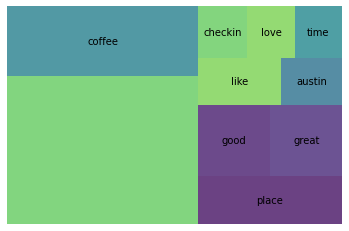

In [735]:
wc_top20 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [736]:
list(shops)

['coffee_shop_name',
 'full_review_text',
 'star_rating',
 'full_review_text_new',
 'tokens',
 'star_rating_int',
 'full_review_text_1']

In [737]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [738]:
#split the Dataset by rating 4-5 stars and 1-3 stars
shops_best = shops[shops['star_rating_int']>=4]
shops_worst = shops[shops['star_rating_int'] < 4]

In [739]:
shops_best = shops_best.sort_values(by=['star_rating_int'], ascending=False)
shops_best.shape


(6140, 7)

In [740]:
shops_worst = shops_worst.sort_values(by=['star_rating_int'], ascending=True)
shops_worst.shape

(1476, 7)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [741]:
# Use the Function for the BEST COFFEE SHOP
wc_best = count(shops_best['tokens'])

In [742]:
# Use the Function for the WORST COFFEE SHOP
wc_worst = count(shops_worst['tokens'])

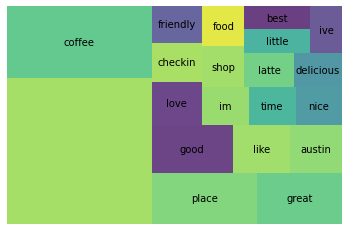

In [743]:
wc_best = count(shops_best['tokens'])

wc_top20_best = wc_best[wc_best['rank'] <= 20]

squarify.plot(sizes=wc_top20_best['pct_total'], label=wc_top20_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

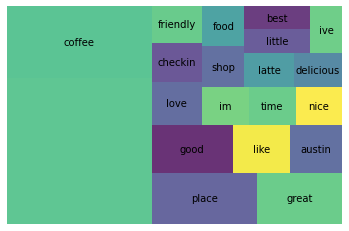

In [744]:
wc_worst = count(shops_best['tokens'])
wc_top20_worst = wc_worst[wc_worst['rank'] <= 20]

squarify.plot(sizes=wc_top20_worst['pct_total'], label=wc_top20_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [745]:
#Extending list of STOP WORDS based on the plot
STOP_WORDS_BEST = nlp.Defaults.stop_words.union(['food', 'time', 'order', 'place', 'ive', 'im', 'checkin', '-.', 'austin!', 'check-ins', 'austin' ,'check-in', '', '1','it', ' ', '-', 'coffee', 'coffe', 'i', "i'm", "i've", "it's", 'it.', "it'", "tri", "drink"])


In [746]:
STOP_WORDS_BEST

{'',
 ' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '-',
 '-.',
 '1',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'austin',
 'austin!',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'check-in',
 'check-ins',
 'checkin',
 'coffe',
 'coffee',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'drink',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'e

In [747]:
#Extending list of STOP WORDS based on the plot
STOP_WORDS_WORST = nlp.Defaults.stop_words.union(['food', 'time', 'order', 'place', 'ive', 'im', 'checkin', '-.', 'austin!', 'check-ins', 'austin', 'check-in', '','1','it','-' ,' ','coffe','coffee', 'tast', 'i', "i'm", "i've", "it's", 'it.', "it'", 'tri', "drink"])


In [748]:
STOP_WORDS_WORST 

{'',
 ' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '-',
 '-.',
 '1',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'austin',
 'austin!',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'check-in',
 'check-ins',
 'checkin',
 'coffe',
 'coffee',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'drink',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'e

In [749]:
#removing STOP WORDS from the extended list again - BEST COFFEE SHOP
tokens1 = []

for doc in tokenizer.pipe(shops_best['full_review_text_new'], batch_size=500):
    
    doc_tokens1 = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS_BEST:
            doc_tokens1.append(token.text.lower())
   
    tokens1.append(doc_tokens1)
    
shops_best['tokens'] = tokens1

shops_best['tokens']

0       [love, love, loved, atmosphere, corner, shop, ...
4278    [love, free, wifi, indoor, outdoor, seating, c...
4291    [checkins, simply, feel, welcome, coffees, gre...
4289    [irie, bean, gem, atmosphere, decor, relaxed, ...
4287    [love, great, spot, hang, good, chai, tea, cas...
                              ...                        
1552       [best, americano, girlfriend, pour, delicious]
1549    [pretty, ambience, good, iced, chai, sad, didn...
1547    [listed, organic, liked, figure, s, hipster, v...
1532    [great, smooth, espresso, pour, light, flavorf...
7615    [finally, stopped, lunch, colleague, glad, del...
Name: tokens, Length: 6140, dtype: object

In [750]:
import re
def clean(text):
    text_updated = re.sub('[$/0-9]', '', text)
    text_updated = text_updated.lower()
    return text_updated

# for doc in shops['tokens']:
#     doc.pop(0)
# shops['tokens']

shops['full_review_text_new'] = shops['full_review_text'].apply(clean)
shops['full_review_text_new']

0          check-in love love loved the atmosphere! ev...
1         listed in date night: austin, ambiance in au...
2          check-in listed in brunch spots i loved the...
3         very cool decor! good drinks nice seating  h...
4          check-in they are located within the northc...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok, the steeping room is awesome. how do the...
7613      loved coming here for tea, and the atmospher...
7614      the food is just average. the booths didn't ...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text_new, Length: 7616, dtype: object

In [751]:
#removing STOP WORDS from the extended list again - WORST COFFEE SHOP
tokens2 = []

for doc in tokenizer.pipe(shops_worst['full_review_text_new'], batch_size=500):
    
    doc_tokens2 = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS_WORST:
            doc_tokens2.append(token.text.lower())
   
    tokens2.append(doc_tokens2)
    
shops_worst['tokens'] = tokens2

shops_worst['tokens']

5780    [bullshit, overhyped, paleo, pre, dry, breakfa...
5945    [ounce, iced, absolutely, insane, charge, cup,...
5946    [normal, circumstances, id, given, stars, time...
5962    [standards, super, low, fact, didnt, like, kin...
5971    [horrible, slow, service, real, menu, items, e...
                              ...                        
5218    [toms, saved, pouring, rain, started, pouring,...
2440    [stars, cute, spot, downtown, area, pick, cash...
5247    [sunday, morning, breakfast, tacos, breakfast,...
5175    [fun, little, shopping, combined, sipped, coff...
7614    [average, booths, didnt, feel, clean, waitstaf...
Name: tokens, Length: 1476, dtype: object

In [752]:
wc_best = count(shops_best['tokens'])

wc_best.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
76,great,2492,3453,1.0,0.013283,0.013283,0.405863
113,good,2191,3095,2.0,0.011906,0.025188,0.356840
70,like,1559,2212,3.0,0.008509,0.033697,0.253909
2,love,1322,1724,4.0,0.006632,0.040329,0.215309
99,friendly,1399,1462,5.0,0.005624,0.045953,0.227850


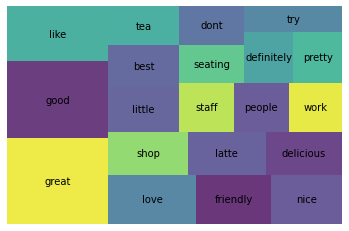

In [753]:
wc_top20_best = wc_best[wc_best['rank'] <= 20]

squarify.plot(sizes=wc_top20_best['pct_total'], label=wc_top20_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [754]:
wc_worst = count(shops_worst['tokens'])

wc_worst.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
75,like,565,876,1.0,0.011932,0.011932,0.382791
199,good,596,876,2.0,0.011932,0.023864,0.403794
35,great,344,466,3.0,0.006347,0.030212,0.233062
64,dont,352,449,4.0,0.006116,0.036328,0.238482
155,service,345,445,5.0,0.006061,0.042389,0.233740


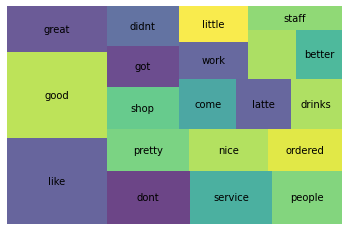

In [755]:
wc_top20_worst = wc_worst[wc_worst['rank'] <= 20]

squarify.plot(sizes=wc_top20_worst['pct_total'], label=wc_top20_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

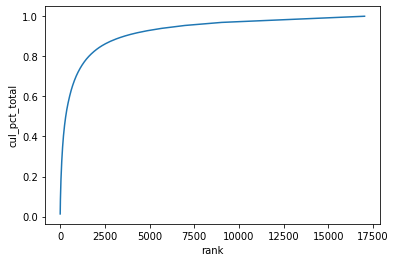

In [756]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_best); # best coffee shop

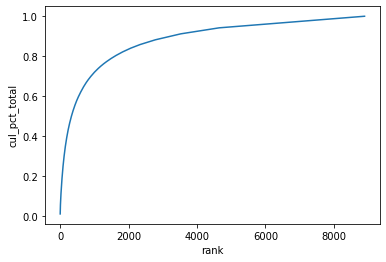

In [757]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_worst); # worst coffee shop

In [758]:
wc_best.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17000,unpacking,1,1,17003.0,0.000004,0.999927,0.000163
17002,marble,1,1,17004.0,0.000004,0.999931,0.000163
17003,goodhad,1,1,17005.0,0.000004,0.999935,0.000163
17005,housea,1,1,17006.0,0.000004,0.999938,0.000163
17004,yodelers,1,1,17007.0,0.000004,0.999942,0.000163
17007,honesttogod,1,1,17008.0,0.000004,0.999946,0.000163
17006,sweetners,1,1,17009.0,0.000004,0.999950,0.000163
17009,walkupdrivethru,1,1,17010.0,0.000004,0.999954,0.000163
17008,brassy,1,1,17011.0,0.000004,0.999958,0.000163
17010,disneys,1,1,17012.0,0.000004,0.999962,0.000163


In [759]:
wc_worst.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8877,constructed,1,1,8883.0,0.000014,0.999741,0.000678
8874,swirling,1,1,8884.0,0.000014,0.999755,0.000678
8879,swarming,1,1,8885.0,0.000014,0.999768,0.000678
8875,tactic,1,1,8886.0,0.000014,0.999782,0.000678
8872,altruistic,1,1,8887.0,0.000014,0.999796,0.000678
8881,exhibit,1,1,8888.0,0.000014,0.999809,0.000678
8878,eyewear,1,1,8889.0,0.000014,0.999823,0.000678
8890,tranquility,1,1,8890.0,0.000014,0.999837,0.000678
8891,fireplaces,1,1,8891.0,0.000014,0.999850,0.000678
8892,logon,1,1,8892.0,0.000014,0.999864,0.000678


In [760]:
wc_best['appears_in_pct'].describe()

count    17022.000000
mean         0.002203
std          0.010146
min          0.000163
25%          0.000163
50%          0.000326
75%          0.000814
max          0.405863
Name: appears_in_pct, dtype: float64

In [761]:
wc_worst['appears_in_pct'].describe()

count    8902.000000
mean        0.004845
std         0.014681
min         0.000678
25%         0.000678
50%         0.000678
75%         0.002710
max         0.403794
Name: appears_in_pct, dtype: float64

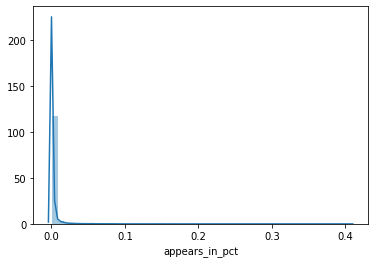

In [762]:
# Frequency of appears in documents rating 4-5
sns.distplot(wc_best['appears_in_pct']);

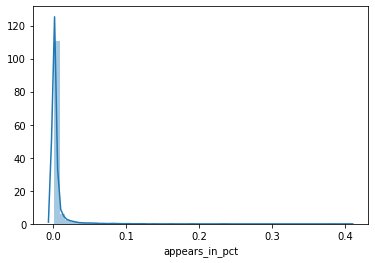

In [763]:
# Frequency of appears in documents rating 1-3
sns.distplot(wc_worst['appears_in_pct']);

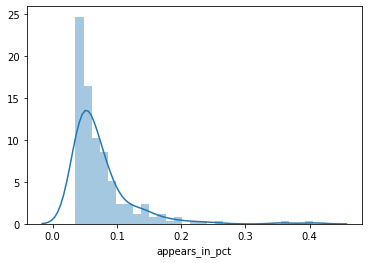

In [764]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc_best = wc_best[wc_best['appears_in_pct'] >= 0.035]

sns.distplot(wc_best['appears_in_pct']);

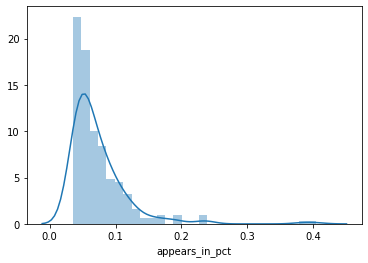

In [765]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc_worst = wc_worst[wc_worst['appears_in_pct'] >= 0.035]

sns.distplot(wc_worst['appears_in_pct']);


In [766]:
# BEST COFFEE SHOP STEMMER
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# Put in a new column `stems`
shops_best['stems']=shops_best['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_best.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_new,tokens,star_rating_int,full_review_text_1,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,checkin love love loved the atmosphere every c...,"[love, love, loved, atmosphere, corner, shop, ...",5,checkin love love loved the atmosphere ever...,"[love, love, love, atmospher, corner, shop, st..."
4278,Irie Bean Coffee Bar,8/14/2013 I love this place. The have free wi...,5,i love this place the have free wifi indoor an...,"[love, free, wifi, indoor, outdoor, seating, c...",5,i love this place the have free wifi indoor ...,"[love, free, wifi, indoor, outdoor, seat, chil..."
4291,Irie Bean Coffee Bar,"4/25/2012 5 check-ins Simply put, I feel welc...",5,checkins simply put i feel welcome here the co...,"[checkins, simply, feel, welcome, coffees, gre...",5,checkins simply put i feel welcome here the...,"[checkin, simpli, feel, welcom, coffe, great, ..."
4289,Irie Bean Coffee Bar,11/4/2010 The Irie Bean is a gem. The atmosph...,5,the irie bean is a gem the atmosphere and deco...,"[irie, bean, gem, atmosphere, decor, relaxed, ...",5,the irie bean is a gem the atmosphere and de...,"[iri, bean, gem, atmospher, decor, relax, bari..."
4287,Irie Bean Coffee Bar,4/3/2013 1 check-in I love this place. It's ...,5,checkin i love this place its such a great sp...,"[love, great, spot, hang, good, chai, tea, cas...",5,checkin i love this place its such a great...,"[love, great, spot, hang, good, chai, tea, cas..."


In [767]:
# worst COFFEE SHOP STEMMER
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# Put in a new column `stems`
shops_worst['stems']=shops_worst['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_worst.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_new,tokens,star_rating_int,full_review_text_1,stems
5780,Picnik Austin,6/19/2016 Bullshit overhyped paleo 8$ coffee ...,1,bullshit overhyped paleo coffee with pre made...,"[bullshit, overhyped, paleo, pre, dry, breakfa...",1,bullshit overhyped paleo coffee with pre ma...,"[bullshit, overhyp, paleo, pre, dri, breakfast..."
5945,Kick Butt Coffee Music & Booze,7/17/2015 $4.75 for a 20 ounce iced coffee? T...,1,for a ounce iced coffee this is absolutely in...,"[ounce, iced, absolutely, insane, charge, cup,...",1,for a ounce iced coffee this is absolutely...,"[ounc, ice, absolut, insan, charg, cup, water,..."
5946,Kick Butt Coffee Music & Booze,"5/6/2015 Under normal circumstances, I'd have...",1,under normal circumstances id have given this ...,"[normal, circumstances, id, given, stars, time...",1,under normal circumstances id have given thi...,"[normal, circumst, id, given, star, time, desp..."
5962,La Tazza Fresca,6/23/2016 My standards for coffee are super l...,1,my standards for coffee are super low so the f...,"[standards, super, low, fact, didnt, like, kin...",1,my standards for coffee are super low so the...,"[standard, super, low, fact, didnt, like, kind..."
5971,La Tazza Fresca,8/28/2016 Horrible!! Slow service and no real...,1,horrible slow service and no real food menu it...,"[horrible, slow, service, real, menu, items, e...",1,horrible slow service and no real food menu ...,"[horribl, slow, servic, real, menu, item, egg,..."


In [768]:
# Put in a new column `stems` - BEST COFFEE SHOP
shops_best['stems']=shops_best['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_best['stems']

0       [love, love, love, atmospher, corner, shop, st...
4278    [love, free, wifi, indoor, outdoor, seat, chil...
4291    [checkin, simpli, feel, welcom, coffe, great, ...
4289    [iri, bean, gem, atmospher, decor, relax, bari...
4287    [love, great, spot, hang, good, chai, tea, cas...
                              ...                        
1552          [best, americano, girlfriend, pour, delici]
1549    [pretti, ambienc, good, ice, chai, sad, didnt,...
1547    [list, organ, like, figur, s, hipster, vibe, s...
1532    [great, smooth, espresso, pour, light, flavor,...
7615    [final, stop, lunch, colleagu, glad, delici, c...
Name: stems, Length: 6140, dtype: object

In [769]:
# Put in a new column `stems` - WORST COFFEE SHOP
shops_worst['stems']=shops_worst['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_worst['stems']

5780    [bullshit, overhyp, paleo, pre, dri, breakfast...
5945    [ounc, ice, absolut, insan, charg, cup, water,...
5946    [normal, circumst, id, given, star, time, desp...
5962    [standard, super, low, fact, didnt, like, kind...
5971    [horribl, slow, servic, real, menu, item, egg,...
                              ...                        
5218    [tom, save, pour, rain, start, pour, got, enjo...
2440    [star, cute, spot, downtown, area, pick, cashi...
5247    [sunday, morn, breakfast, taco, breakfast, mun...
5175    [fun, littl, shop, combin, sip, coffe, brows, ...
7614    [averag, booth, didnt, feel, clean, waitstaff,...
Name: stems, Length: 1476, dtype: object

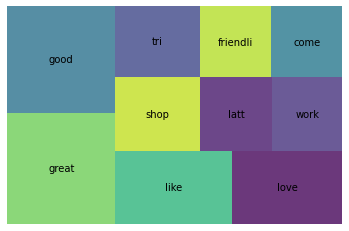

In [770]:
wc_best = count(shops_best['stems'])
wc_top10_best = wc_best[wc_best['rank'] <= 10]

squarify.plot(sizes=wc_top10_best['pct_total'], label=wc_top10_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

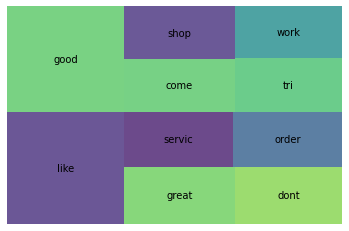

In [771]:
wc_worst = count(shops_worst['stems'])
wc_top10_worst = wc_worst[wc_worst['rank'] <= 10]

squarify.plot(sizes=wc_top10_worst['pct_total'], label=wc_top10_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [772]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [773]:
from tqdm import tqdm 
tqdm.pandas()

/home/desktop-g6i88eikhisl/miniconda3/envs/Unit-4-Sprint-1/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [774]:
shops_best['lemmas'] = shops_best['full_review_text_new'].progress_apply(get_lemmas)

100%|██████████| 6140/6140 [03:39<00:00, 28.00it/s]


In [775]:
from tqdm import tqdm 
tqdm.pandas()

In [776]:
shops_worst['lemmas'] = shops_worst['full_review_text_new'].progress_apply(get_lemmas)

100%|██████████| 1476/1476 [00:54<00:00, 26.93it/s]


In [777]:
shops_best['lemmas'].head()

0       [checkin, love, love, love, atmosphere, corner...
4278    [love, place, free, wifi, indoor, outdoor, sea...
4291    [checkin, simply, feel, welcome, coffee, great...
4289    [irie, bean, gem, atmosphere, decor, relaxed, ...
4287    [checkin, love, place,  , great, spot, hang, d...
Name: lemmas, dtype: object

In [778]:
shops_worst['full_review_text_new'].head()

5780    bullshit overhyped paleo  coffee with pre made...
5945    for a  ounce iced coffee this is absolutely in...
5946    under normal circumstances id have given this ...
5962    my standards for coffee are super low so the f...
5971    horrible slow service and no real food menu it...
Name: full_review_text_new, dtype: object

In [779]:
shops_worst['lemmas'].head()

5780    [bullshit, overhyped, paleo,  , coffee, pre, d...
5945    [ , ounce, iced, coffee, absolutely, insane, c...
5946    [normal, circumstance, would, give, place, sta...
5962    [standard, coffee, super, low, fact, not, like...
5971    [horrible, slow, service, real, food, menu, it...
Name: lemmas, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


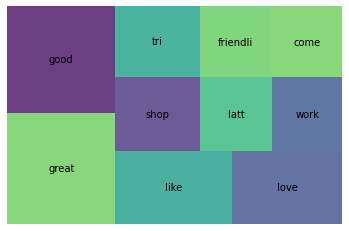

In [780]:
wc_best = count(shops_best['stems'])
wc_top10_best = wc_best[wc_best['rank'] <= 10]

squarify.plot(sizes=wc_top10_best['pct_total'], label=wc_top10_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

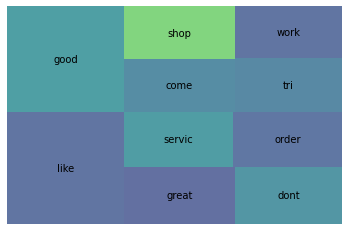

In [781]:
wc_worst = count(shops_worst['stems'])
wc_top10_worst = wc_worst[wc_worst['rank'] <= 10]

squarify.plot(sizes=wc_top10_worst['pct_total'], label=wc_top10_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

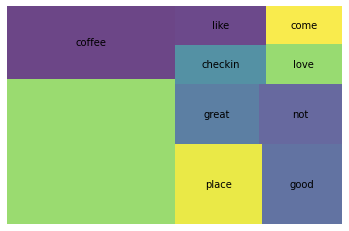

In [782]:
wc_best = count(shops_best['lemmas'])
wc_top10_best = wc_best[wc_best['rank'] <= 10]

squarify.plot(sizes=wc_top10_best['pct_total'], label=wc_top10_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

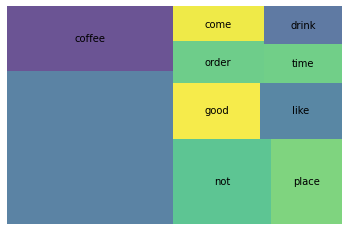

In [783]:
wc_worst = count(shops_worst['lemmas'])
wc_top10_worst = wc_worst[wc_worst['rank'] <= 10]

squarify.plot(sizes=wc_top10_worst['pct_total'], label=wc_top10_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

